# Hamoye Stage E July 2021 Internship Assignment

In this assignment, we’ll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

The dataset used can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates=True)#, dtype={'Date': str, 'Time': str, 'Global_active_power': float, 'Global_reactive_power': float, 'Voltage': float, 'Global_intensity': float, 'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3': float}, date_parser = pd.to_datetime)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
#check for missing values
df.isnull().values.any() 
df.isnull().sum() 

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df[ "Date" ]) #convert column to datetime
df.set_index( "Date" , inplace= True ) 

In [8]:
df['Time'] = pd.to_datetime(df['Time']).dt.time #convert column to time
#  pd.to_datetime(df[ "Time" ],format= '%H:%M:%S' ).dt.time

### I noticed that some columns have ```'?'``` in them so I decided to change them to null values.

In [9]:
df['Global_active_power'].value_counts()

?        25979
0.218     9565
0.216     9363
0.322     9350
0.324     9304
         ...  
7.408        1
6.818        1
7.488        1
8.206        1
7.984        1
Name: Global_active_power, Length: 4187, dtype: int64

In [10]:
df['Global_active_power'] = df['Global_active_power'].replace('?', np.nan)

In [11]:
df['Global_reactive_power'].value_counts()

0.000    481561
?         25979
0.100     21902
0.092     21841
0.098     21812
          ...  
1.240         1
1.038         1
1.180         1
1.222         1
1.118         1
Name: Global_reactive_power, Length: 533, dtype: int64

In [12]:
df['Global_reactive_power'] = df['Global_reactive_power'].replace('?', np.nan)

In [13]:
df['Voltage'].value_counts()

?          25979
241.180     3559
241.120     3289
241.350     3285
241.020     3284
           ...  
252.880        1
225.590        1
252.450        1
253.450        1
225.050        1
Name: Voltage, Length: 2838, dtype: int64

In [14]:
df['Voltage'] = df['Voltage'].replace('?', np.nan)

In [15]:
df['Global_intensity'].value_counts()

1.000     172785
1.400     164720
1.200     140425
1.600     118212
1.800      95395
           ...  
43.200         1
44.400         1
45.800         1
40.000         1
40.600         1
Name: Global_intensity, Length: 222, dtype: int64

In [16]:
df['Global_intensity'] = df['Global_intensity'].replace('?', np.nan)

In [17]:
df['Sub_metering_1'].value_counts()

0.000     1880175
1.000       84936
?           25979
2.000       19017
38.000      16119
           ...   
82.000          3
87.000          3
88.000          3
86.000          2
84.000          2
Name: Sub_metering_1, Length: 89, dtype: int64

In [18]:
df['Sub_metering_1'] = df['Sub_metering_1'].replace('?', np.nan)

In [19]:
df['Sub_metering_2'].value_counts()

0.000     1436830
1.000      378224
2.000      157075
?           25979
3.000        7189
           ...   
50.000         32
77.000         24
79.000          8
78.000          3
80.000          2
Name: Sub_metering_2, Length: 82, dtype: int64

In [20]:
df['Sub_metering_2'] = df['Sub_metering_2'].replace('?', np.nan)

In [21]:
df['Sub_metering_3'].value_counts()

0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: Sub_metering_3, dtype: int64

In [22]:
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [23]:
df_copy = df.copy() 

In [24]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method= 'ffill' )
df_copy_ffill.isnull().sum() 

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [25]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method= 'bfill' )
df_copy_bfill.isnull().sum() 

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [26]:
#Filling missing data by interpolation forward
df_copy_LIF = df_copy.interpolate(method= 'linear' , limit_direction= 'forward' )
df_copy_LIF.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [27]:
#Filling missing data by interpolation, backward
df_copy_LIB = df_copy.interpolate(method= 'linear' , limit_direction= 'backward' )
df_copy_LIB.isnull().sum() 

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [28]:
#Downsample to quarterly data points
df_quarterly = df_copy_ffill.resample( '3M' ).mean() 

In [ ]:
#question 1 # sum over the minutes for each day
df_mean = df_copy_ffill.resample( '3M' ).mean()
#df_daily = df_copy_ffill.resample( 'D' ).mean() 
# global active power

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_mean.index, df_mean.Global_active_power, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' ) 

In [46]:
df_copy_ffill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    object 
 2   Global_reactive_power  object 
 3   Voltage                object 
 4   Global_intensity       object 
 5   Sub_metering_1         object 
 6   Sub_metering_2         object 
 7   Sub_metering_3         float64
dtypes: float64(1), object(7)
memory usage: 142.5+ MB


In [50]:
df_copy_ffill['Global_active_power'] = df_copy_ffill['Global_active_power'].astype(float)
df_copy_ffill['Global_reactive_power'] = df_copy_ffill['Global_reactive_power'].astype(float)
df_copy_ffill['Voltage'] = df_copy_ffill['Voltage'].astype(float)
df_copy_ffill['Global_intensity'] = df_copy_ffill['Global_intensity'].astype(float)
df_copy_ffill['Sub_metering_1'] = df_copy_ffill['Sub_metering_1'].astype(float)
df_copy_ffill['Sub_metering_2'] = df_copy_ffill['Sub_metering_2'].astype(float)

In [60]:
df_copy_ffill['Time'] = pd.to_datetime(df_copy_ffill['Time']).dt.time

TypeError: <class 'datetime.time'> is not convertible to datetime

### Question 12

In [51]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_copy_ffill['Global_active_power'], df_copy_ffill['Global_reactive_power'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.246


### Question 13

In [52]:
corr, _ = pearsonr(df_copy_ffill['Voltage'].astype(float), df_copy_ffill['Global_intensity'].astype(float))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.407


In [29]:
df_quarterly

,Sub_metering_3
Date,
2006-12-31,7.409847
2007-03-31,6.453071
2007-06-30,4.785791
2007-09-30,5.101064
2007-12-31,6.671067
2008-03-31,6.038675
2008-06-30,6.449664
2008-09-30,5.173445
2008-12-31,6.488338


Text(0, 0.5, 'active energy consumed every minute')

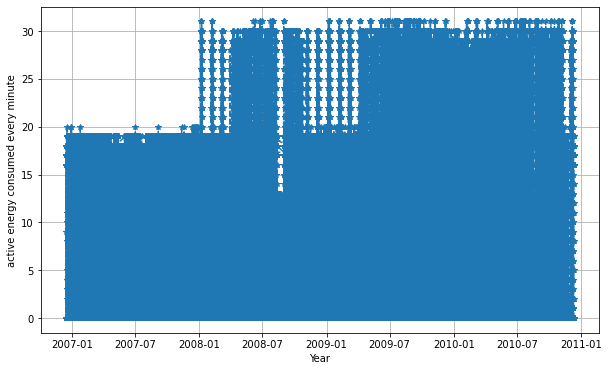

In [53]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_copy_ffill.index, df_copy_ffill.Sub_metering_3, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' ) 

Text(0, 0.5, 'active energy consumed every minute')

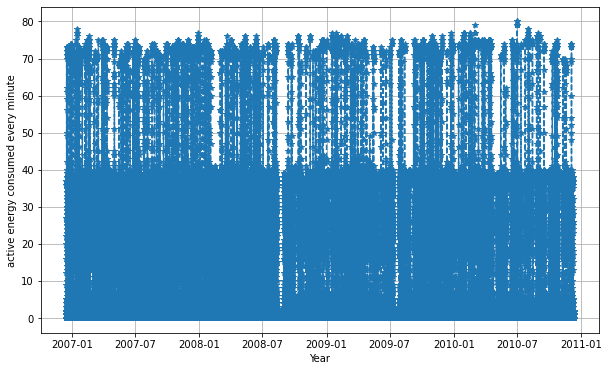

In [54]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_copy_ffill.index, df_copy_ffill.Sub_metering_2, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

Text(0, 0.5, 'active energy consumed every minute')

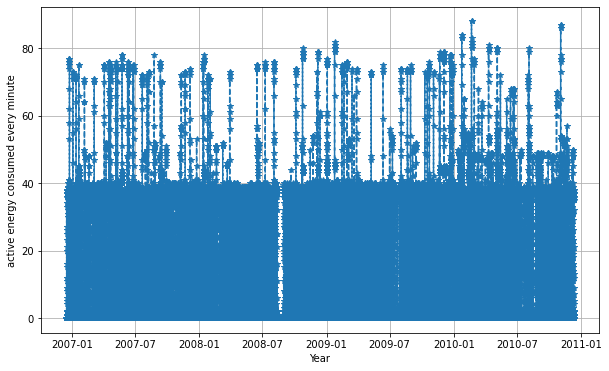

In [55]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_copy_ffill.index, df_copy_ffill.Sub_metering_1, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

Text(0, 0.5, 'active energy consumed every minute')

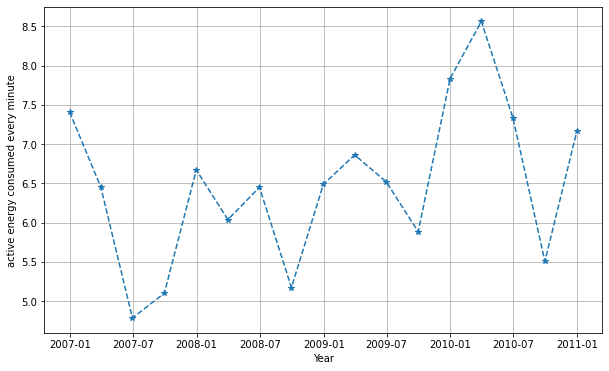

In [56]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_quarterly, '--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

In [57]:
#Upsample to daily data points
df_daily = df_copy_ffill.resample( 'D' ).mean() 

In [58]:
df_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-12-07,0.770538,0.198550,240.218646,3.397222,1.197222,0.448611,4.475000
2010-12-08,0.367846,0.117429,240.794931,1.623750,0.000000,0.356944,2.765278
2010-12-09,1.119508,0.139832,241.619722,4.755694,1.253472,1.444444,6.174306


In [71]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Voltage '--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'x' )
plt.ylabel( 'y' )

SyntaxError: invalid syntax (<ipython-input-71-6abbce787df5>, line 2)

Text(0, 0.5, 'active energy consumed every minute')

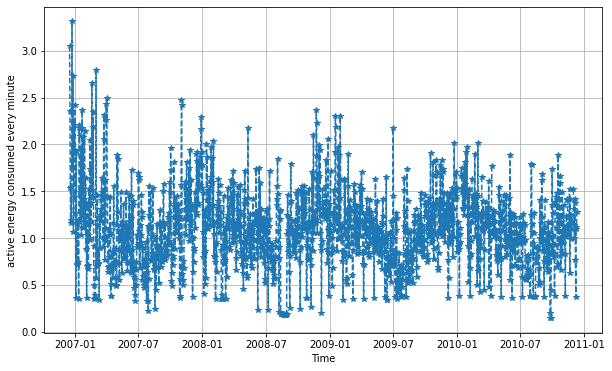

In [70]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Global_active_power,'--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'Time' )
plt.ylabel( 'active energy consumed every minute' )

In [36]:
MA_1 = df_copy_ffill[ 'Sub_metering_1' ].rolling( 12 ).mean() 
MA_2 = df_copy_ffill[ 'Sub_metering_2' ].rolling( 12 ).mean() 
MA_3 = df_copy_ffill[ 'Sub_metering_3' ].rolling( 12 ).mean() 

Text(0, 0.5, 'active energy consumed every minute')

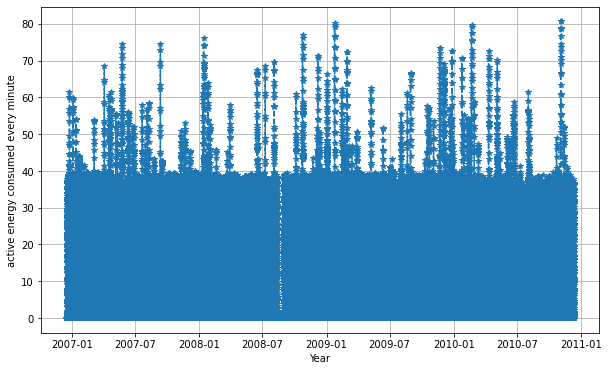

In [37]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(MA_1, '--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

Text(0, 0.5, 'active energy consumed every minute')

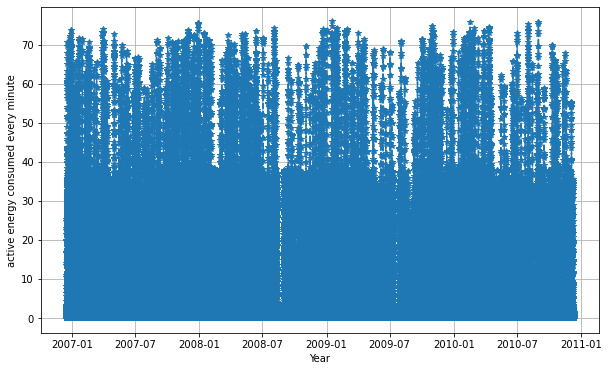

In [38]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(MA_2, '--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

Text(0, 0.5, 'active energy consumed every minute')

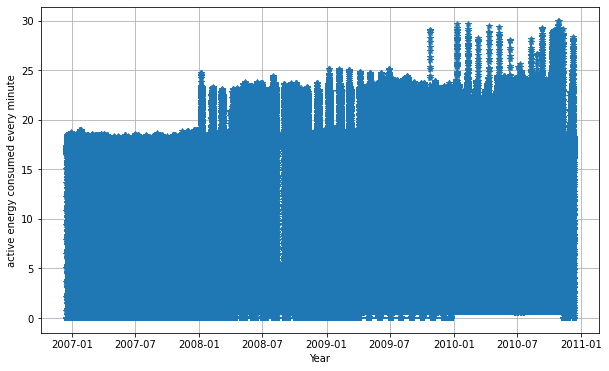

In [39]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(MA_3, '--' , marker= '*' , )
plt.grid() 
plt.xlabel( 'Year' )
plt.ylabel( 'active energy consumed every minute' )

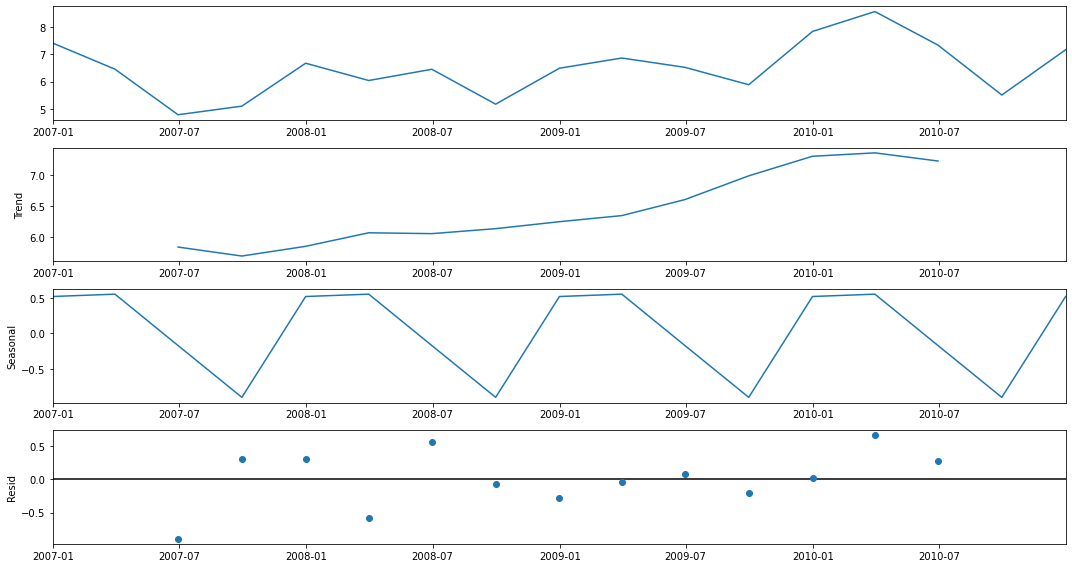

In [40]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df_quarterly, model= 'additive' )
decompose_series.plot()  #df_copy_ffill
plt.show() 

In [41]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_quarterly) #df[ 'Passengers' ]
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]}' )
print( f'No. of observations used : {adf_result[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' ) 


ADF Statistic: -0.415203538363388
p-value: 0.9075292157201389 
No. of lags used: 3
No. of observations used : 13
Critical Values:
 1% : -4.068853732362312 
 5% : -3.1271488757396453 
 10% : -2.7017297633136095 


In [42]:
df_ffill_1 = df_copy_ffill[['Sub_metering_1']]
df_ffill_2 = df_copy_ffill[['Sub_metering_2']]
df_ffill_3 = df_copy_ffill[['Sub_metering_3']]

In [43]:
adf_result_1 = adfuller(df_ffill_1) #df[ 'Passengers' ]
print( f'ADF Statistic: {adf_result_1[ 0 ]}' )
print( f'p-value: {adf_result_1[ 1 ]} ' )
print( f'No. of lags used: {adf_result_1[ 2 ]}' )
print( f'No. of observations used : {adf_result_1[ 3 ]}' )
print( 'Critical Values:' )
for k, v in adf_result_1[ 4 ].items():
    print( f' {k} : {v} ' ) 

MemoryError: Unable to allocate 760. MiB for an array with shape (48, 2075113) and data type float64

In [ ]:
#From the results obtained, the p-value is greater than the critical value at a 5%
#significance level and, the ADF statistic is greater that any of the critical values obtain. 
#This confirms that the series is indeed non-stationary. 

In [ ]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing .apply(pd.to_numeric)
df_log = np.log(df_quarterly)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_quarterly, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' ) 

In [ ]:
# using stochastic models
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_diff, lags = range( 0 , 9 ))
plt.show()
#PACF
plot_pacf(df_diff, lags = range( 0 , 8 ))
plt.show() 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=( 2 , 0 , 0 ))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color= 'red' ) 

In [ ]:
MA_model = ARIMA(df_diff, order=( 0 , 0 , 2 ))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color= 'red' ) 

In [ ]:
ARIMA_model = ARIMA(df_diff, order=( 2 , 0 , 1 )) 
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color= 'red' ) 

In [ ]:
de=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )

In [ ]:
de

In [ ]:
de[ 'Month' ]= pd.to_datetime(de[ 'Month' ])
de = de.rename(columns={ "Month" : "ds" , "Passengers" : "y" })
de.head() 

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_copy_ffill) 